In [2]:
import pandas as pd
import matplotlib.pyplot as plt # viz
import seaborn as sns # better viz
import numpy as np # numerical python
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv(f"cleaned_data.csv")
df = data.copy()
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0


## How does screen time affect the amount and quality of sleep?

In [53]:
display(df.groupby("sleep_quality_1_5")["screen_time_hours"].count())

sleep_quality_1_5
1    275
2     94
3     28
4      3
Name: screen_time_hours, dtype: int64

In [52]:
display(df.groupby("sleep_quality_1_5")["screen_time_hours"].mean())

sleep_quality_1_5
1    9.484727
2    8.181596
3    7.584643
4    6.740000
Name: screen_time_hours, dtype: float64

In [54]:
display(df.groupby("sleep_quality_1_5")["work_screen_hours"].mean())

sleep_quality_1_5
1    2.297309
2    2.009255
3    1.795000
4    0.780000
Name: work_screen_hours, dtype: float64

In [55]:
display(df.groupby("sleep_quality_1_5")["leisure_screen_hours"].mean())

sleep_quality_1_5
1    7.187418
2    6.172340
3    5.789643
4    5.960000
Name: leisure_screen_hours, dtype: float64

In [15]:
pd.crosstab(df["sleep_quality_1_5"], df["screen_time_hours"])

screen_time_hours,1.00,1.32,2.44,3.49,3.64,3.69,3.76,3.93,4.10,4.30,4.47,4.48,4.56,4.87,4.89,4.96,5.00,5.03,5.04,5.07,5.18,5.28,5.35,5.41,5.44,5.50,5.52,5.57,5.59,5.65,5.74,5.84,5.85,5.87,5.90,5.98,6.00,6.02,6.03,6.09,6.10,6.15,6.20,6.21,6.26,6.28,6.31,6.32,6.34,6.37,6.40,6.42,6.43,6.55,6.61,6.67,6.71,6.76,6.77,6.82,6.85,6.86,6.89,6.90,6.92,6.95,6.97,7.02,7.04,7.05,7.06,7.13,7.16,7.17,7.18,7.22,7.24,7.26,7.30,7.32,7.34,7.35,7.38,7.40,7.41,7.42,7.43,7.46,7.47,7.48,7.49,7.51,7.52,7.57,7.58,7.63,7.64,7.67,7.71,7.72,7.73,7.75,7.76,7.77,7.80,7.82,7.83,7.85,7.86,7.88,7.94,7.95,7.98,7.99,8.05,8.06,8.07,8.08,8.12,8.14,8.16,8.18,8.23,8.29,8.32,8.38,8.45,8.47,8.53,8.55,8.56,8.57,8.60,8.62,8.64,8.70,8.71,8.72,8.73,8.75,8.76,8.80,8.81,8.86,8.87,8.88,8.89,8.93,8.97,8.98,8.99,9.01,9.02,9.04,9.05,9.07,9.11,9.13,9.14,9.17,9.20,9.23,9.24,9.26,9.31,9.32,9.37,9.39,9.43,9.47,9.51,9.52,9.53,9.55,9.57,9.58,9.59,9.61,9.62,9.65,9.66,9.69,9.72,9.73,9.75,9.78,9.80,9.81,9.82,9.83,9.86,9.87,9.88,9.93,9.94,9.98,10.02,10.03,10.04,10.05,10.07,10.09,10.12,10.13,10.14,10.17,10.18,10.19,10.20,10.23,10.24,10.25,10.26,10.27,10.30,10.31,10.33,10.34,10.36,10.37,10.38,10.39,10.40,10.42,10.44,10.47,10.48,10.54,10.57,10.60,10.63,10.64,10.68,10.70,10.75,10.79,10.82,10.84,10.89,10.95,10.97,11.02,11.04,11.05,11.06,11.09,11.10,11.12,11.13,11.14,11.15,11.16,11.19,11.20,11.21,11.22,11.23,11.27,11.28,11.30,11.38,11.49,11.54,11.55,11.58,11.61,11.64,11.65,11.67,11.71,11.75,11.79,11.81,11.85,11.94,11.96,12.02,12.03,12.05,12.06,12.18,12.19,12.27,12.39,12.51,12.55,12.56,12.63,12.67,12.69,12.73,12.92,13.05,13.08,13.22,13.29,13.40,13.44,13.49,13.51,13.59,13.66,13.90,14.00,14.02,14.07,14.09,14.18,14.22,14.35,15.38,16.29,16.36,19.17
sleep_quality_1_5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,2,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,1,1,0,1,1,0,1,1,0,0,4,1,1,0,0,1,1,1,1,2,1,1,1,0,0,0,0,0,0,2,1,1,0,1,0,1,0,1,0,1,0,1,1,0,3,1,0,0,1,0,2,0,1,1,1,1,1,1,2,1,0,2,0,0,1,1,0,0,1,1,1,1,1,0,2,1,2,1,2,1,1,0,1,1,3,1,1,1,2,0,1,1,1,1,1,2,2,1,3,2,0,1,0,1,2,0,1,0,2,1,0,1,1,0,1,1,1,2,0,0,1,1,1,1,1,0,2,1,1,1,1,0,2,1,1,0,1,1,1,1,0,1,1,2,4,1,1,1,3,1,2,1,1,2,0,1,1,1,1,0,1,1,2,1,1,2,0,1,1,0,1,1,1,1,0,2,2,0,1,1,1,2,1,1,1,1,1,1,2,1,1,1,1,2,0,1,1,0,0,0,0,1,1,1,1,0,0,1,1,1,1,1,2,1,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1
2,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,0,0,0,1,1,0,0,1,2,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,2,0,1,0,0,1,0,0,0,0,0,1,0,1,0,2,0,1,1,0,1,0,0,1,1,0,1,0,0,1,0,2,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,1,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

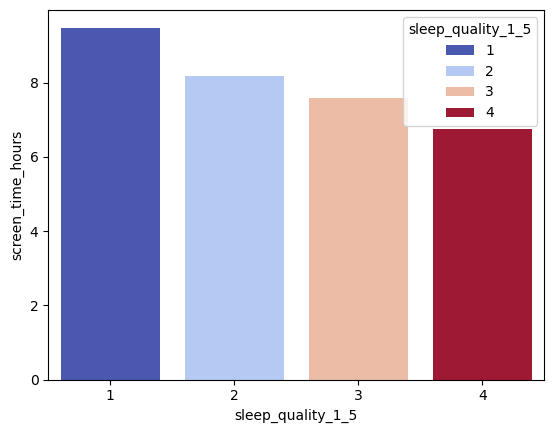

In [49]:
sns.barplot(data=df, y="screen_time_hours", x="sleep_quality_1_5", errorbar=None, palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

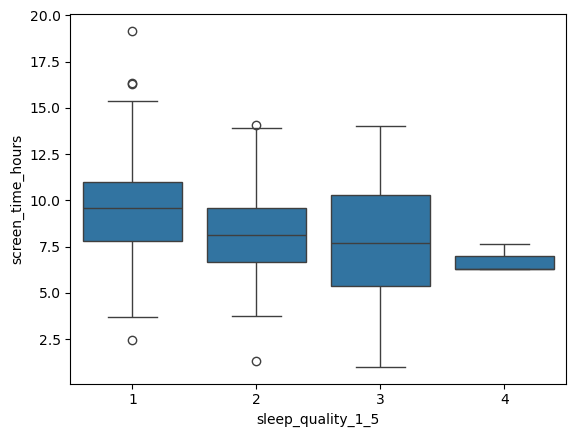

In [20]:
sns.boxplot(data=df, y="screen_time_hours", x="sleep_quality_1_5")
plt.show()

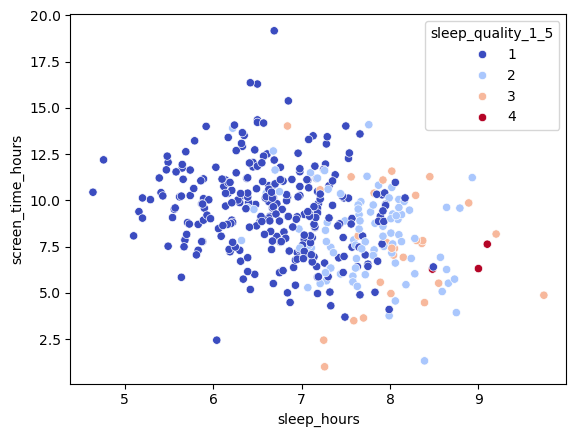

In [28]:
sns.scatterplot(data=df, y="screen_time_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

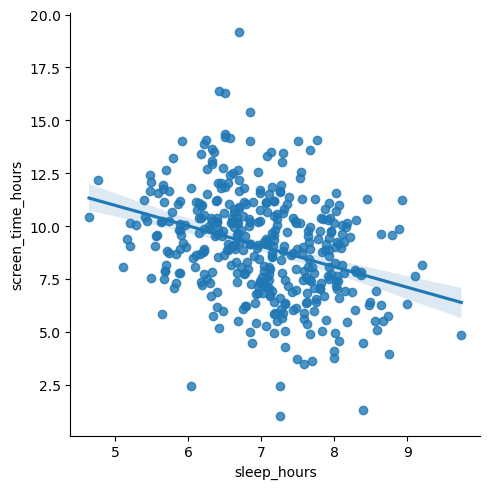

In [46]:
sns.lmplot(data=df, y="screen_time_hours", x="sleep_hours")
plt.show()

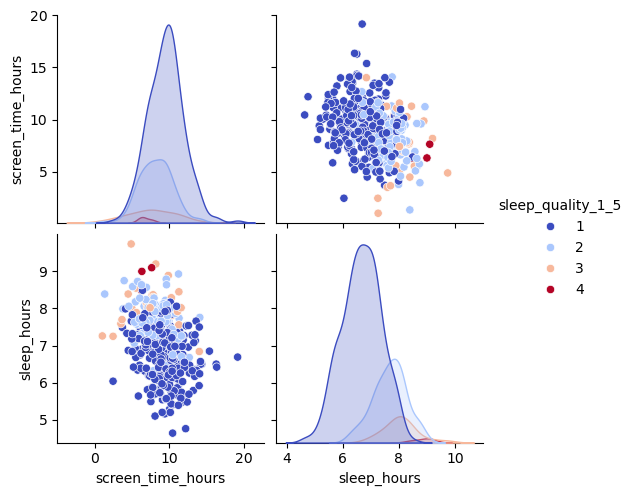

In [30]:
sns.pairplot(df[["screen_time_hours", "sleep_hours", "sleep_quality_1_5"]], hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

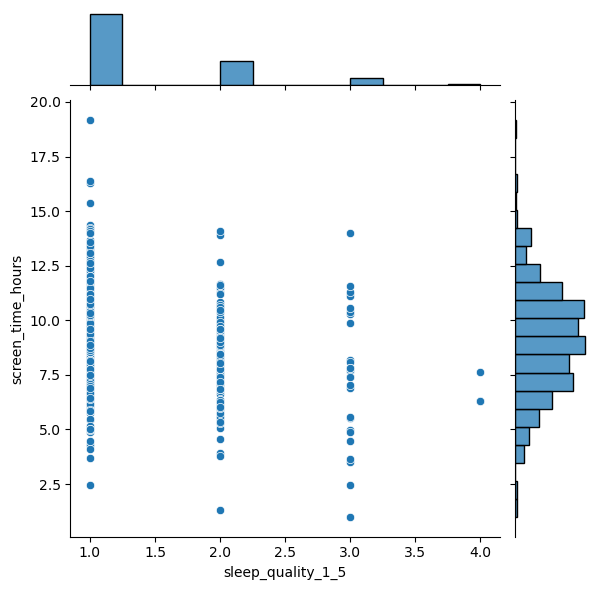

In [31]:
sns.jointplot( y=df["screen_time_hours"], x=df["sleep_quality_1_5"])
plt.show()

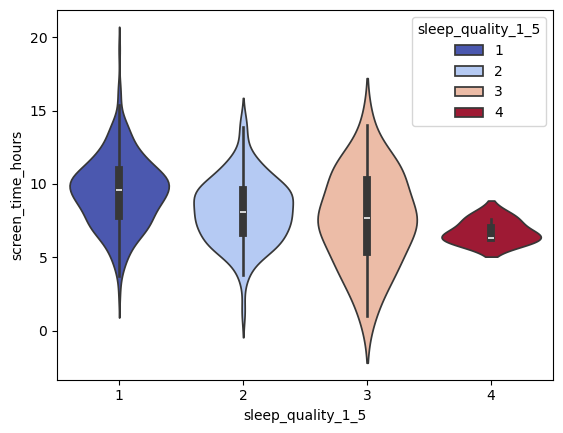

In [43]:
sns.violinplot(data=df, x="sleep_quality_1_5", y="screen_time_hours", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

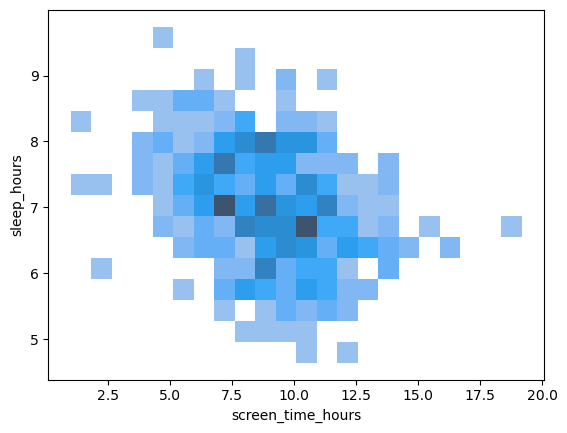

In [68]:
sns.histplot(df, x=df["screen_time_hours"], y=df["sleep_hours"])
plt.show()

Mathematical correlations

In [33]:
# Pearson correlation coefficient

pearson = round(float(df["screen_time_hours"].corr(df["sleep_hours"], method="pearson")), 2)
pearson

-0.33

In [34]:
round(float(df["screen_time_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.28

In [37]:
round(float(df["sleep_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

0.61

In [35]:
# Spearman correlation coefficient

spearman = round(float(df["screen_time_hours"].corr(df["sleep_hours"], method="spearman")), 2)
spearman

-0.34

In [36]:
round(float(df["screen_time_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.27

In [38]:
round(float(df["sleep_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

0.63

There is a weak negative linear and weak monotonous correlation between the amount of screen hours and sleep hours, as well as between screen hours and the self-reported quality of sleep.
The correlations between sleep hours and the quality of sleep are however more significant: there is moderate to strong positive linear correlation and a moderate to strong monotonous correlation.

## Types of screen hours

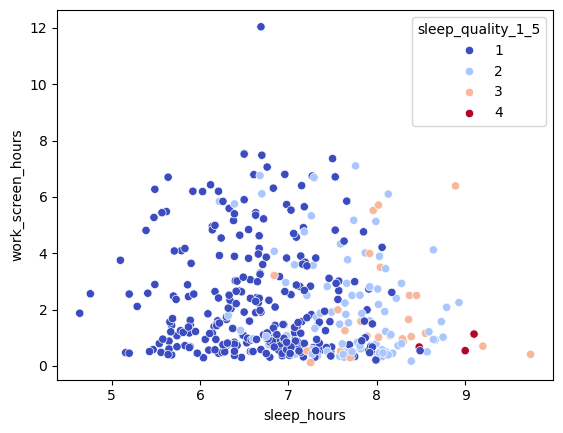

In [39]:
sns.scatterplot(data=df, y="work_screen_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

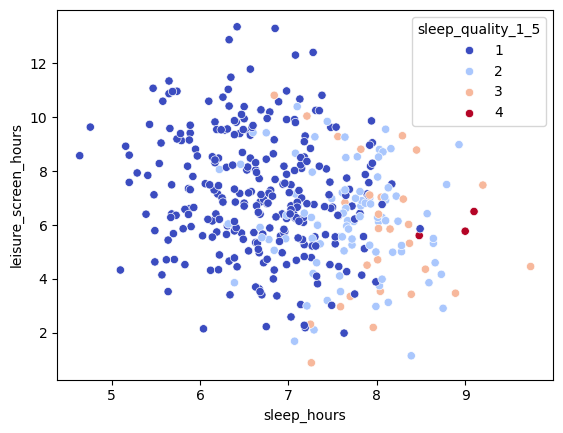

In [40]:
sns.scatterplot(data=df, y="leisure_screen_hours", x="sleep_hours", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

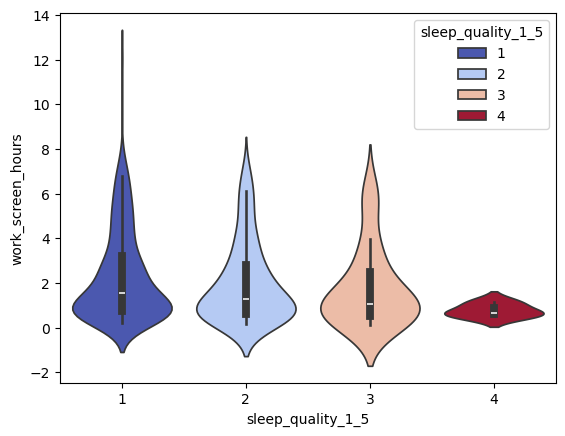

In [44]:
sns.violinplot(data=df, x="sleep_quality_1_5", y="work_screen_hours", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

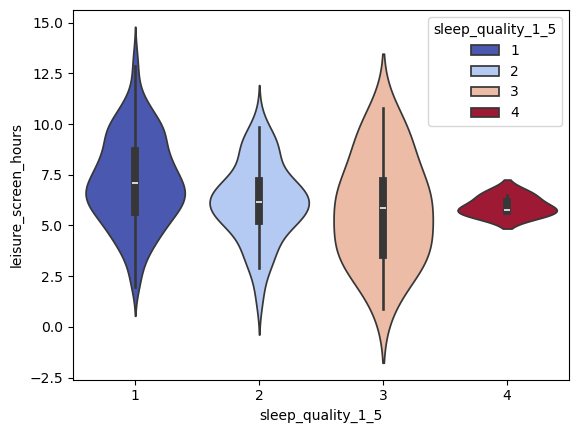

In [45]:
sns.violinplot(data=df, x="sleep_quality_1_5", y="leisure_screen_hours", palette="coolwarm", hue="sleep_quality_1_5")
plt.show()

In [56]:
round(float(df["work_screen_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.1

In [58]:
round(float(df["work_screen_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.1

In [57]:
round(float(df["leisure_screen_hours"].corr(df["sleep_quality_1_5"], method="pearson")), 2)

-0.22

In [59]:
round(float(df["leisure_screen_hours"].corr(df["sleep_quality_1_5"], method="spearman")), 2)

-0.22

## Exercise? Social Hours?

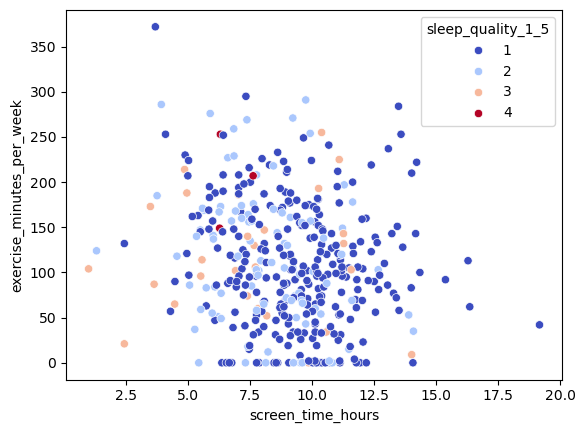

In [63]:
sns.scatterplot(data=df, x="screen_time_hours", y="exercise_minutes_per_week", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()

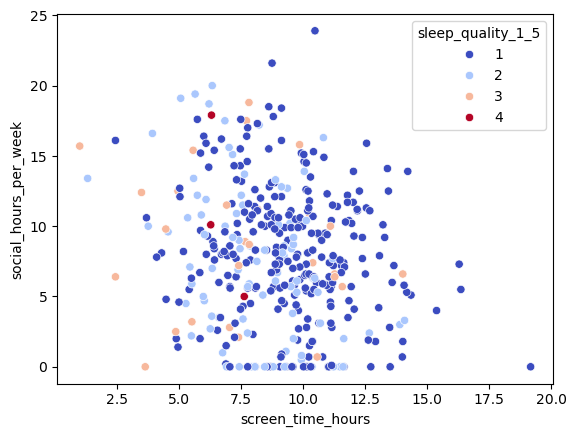

In [64]:
sns.scatterplot(data=df, x="screen_time_hours", y="social_hours_per_week", hue="sleep_quality_1_5", palette="coolwarm")
plt.show()